# Assignment 06: Control Charts for Variables III
Sydney Perrin

February 18th, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df = pd.read_csv('06 data.csv')
#df.head(100)

## 1. The uniformity of a silicon wafer following an etching process is determined by measuring the layer thickness at several locations and expressing uniformity as the range of the thicknesses. The uniformity determinations for 30 consecutive wafers processed through the etching tool are presented in the dataset. Is there evidence that uniformity is normally distributed?
ANS: No, the data is not normally distributed. The p-values produced from both the Shapiro test and normal test are less than 0.05

### Check for Normality

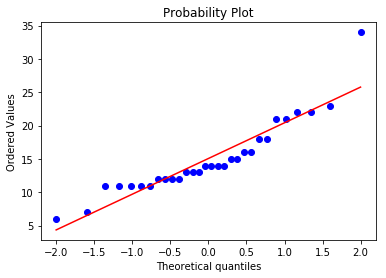

(0.8805410265922546, 0.0029010481666773558)
NormaltestResult(statistic=15.88152843757453, pvalue=0.00035593436261537205)


In [3]:
x=df['Layer thickness']

# Graphic Test
stat.probplot(x, plot=plt)
plt.show() 

# Stats Test
t1=stat.shapiro(x)
t2=stat.normaltest(x)
print(t1)
print(t2)

## 2. Take the natural logarithm of the data to make it normally distributed (check to see if that’s true!). Construct a control chart for individuals and a moving range control chart for uniformity for the etching process using the transformed data. Is the process in statistical control?
ANS: See MR and I charts in the code below. Yes, the process is in statistical control because there are no points out of bounds in the control charts.

### Normalize Data and Re-Check for Normality

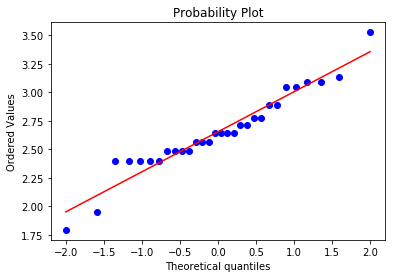

(0.9521750211715698, 0.1932660937309265)
NormaltestResult(statistic=1.943855327603578, pvalue=0.3783529973156373)


In [4]:
y=np.log(x)

# Graphic Test
stat.probplot(y, plot=plt)
plt.show() 

# Stats Test
t1=stat.shapiro(y)
t2=stat.normaltest(y)
print(t1)
print(t2)

# The data is normalized. The p-values are greater than 0.05

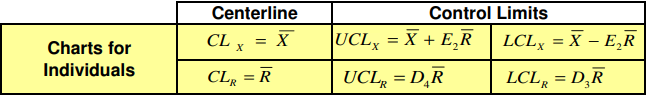

### Moving Range (MR) Calculations

In [6]:
m=30 # Number of samples
n=1 # Sample size

MR = (m-1)*[None]
for i in range(m-1):
    MR[i]=np.abs(y[i+1]-y[i])

# MR control chart constants for n=2
A2=1.880
d2=1.128
D4=3.267
D3=0

MRbar=np.mean(MR)
CL_MR = MRbar
UCL_MR = D4*MRbar
LCL_MR = D3*MRbar #0

print('CL_MR=', CL_MR)
print('UCL_MR=', UCL_MR)
print('LCL_MR=', LCL_MR)

CL_MR= 0.3508855205640929
UCL_MR= 1.1463429956828914
LCL_MR= 0.0


### Plot MR Chart

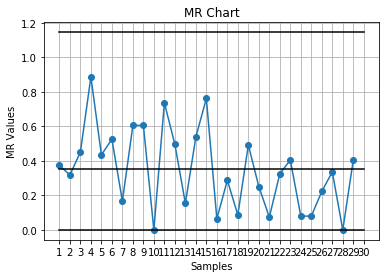

In [11]:
m=30
ucl_line = np.full(m,UCL_MR) 
lcl_line = np.full(m,LCL_MR) 
cl_line = np.full(m,CL_MR) 
plt.plot(MR,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('MR Chart')
plt.ylabel('MR Values')
plt.xlabel('Samples')
plt.show()

# Check
# print(MR<LCL_MR)

# There are no points out of bounds.

### Individuals (I) Calculations

In [12]:
# Individuals control chart contant for n=2
E2=2.660

xbar=np.mean(y)
CL_x=xbar
UCL_x=xbar+E2*MRbar
LCL_x=xbar-E2*MRbar

print('CL_x=', CL_x)
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

CL_x= 2.653095195248599
UCL_x= 3.586450679949086
LCL_x= 1.719739710548112


### Plot I Chart

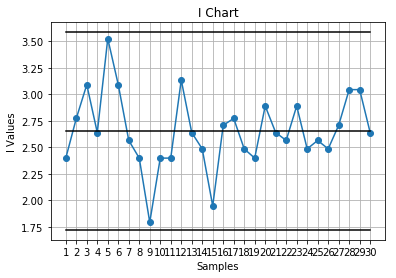

In [17]:
m=30

ucl_line = np.full(m,UCL_x)
lcl_line = np.full(m,LCL_x) 
cl_line = np.full(m,CL_x) 
plt.plot(y,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('I Chart')
plt.ylabel('I Values')
plt.xlabel('Samples')
plt.show()

# There are no points out of bounds.

## 3. What is the value of MR-bar?
ANS: The value is MRbar=0.351

In [18]:
print('MRbar=', MRbar)

MRbar= 0.3508855205640929


## 4. What is the estimate of the standard deviation for this process? (for the normally distributed data).
ANS: The estimate of the standard deviation is sigma=0.311

In [19]:
sigma = MRbar/d2
print('sigma=', sigma)

sigma= 0.3110687239043377


## 5. What are the upper and lower control limits for the I-chart?
ANS: The upper and lower control limits are UCL=3.59 and LCL=1.72

In [20]:
print('UCL_x=', UCL_x)
print('LCL_x=', LCL_x)

UCL_x= 3.586450679949086
LCL_x= 1.719739710548112


## 6. What is the estimate of the mean for this process? (for the normally distributed data).
ANS: The estimate of the mean is mu=2.65

In [21]:
print('mu=', CL_x)

mu= 2.653095195248599
